<h1> K Means Clustering </h1> 

### Table of Content

1. [Data Description](#dd)
2. [Importing the dataset and packages](#import)
3. [Exploratory Data Analysis](#eda)
4. [Finding Clusters with Elbow Method](#elbow)
5. [Building K Means model](#Kmeans)

### 1. Data Description  <a id='dd'>
You have been provided power consumption data of 1000 households.

Attribute Information:

1.date: Date in format dd/mm/yyyy 2.time: time in format hh:mm:ss 3.global_active_power: household global minute-averaged active power (in kilowatt) 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 5.voltage: minute-averaged voltage (in volt) 6.global_intensity: household global minute-averaged current intensity (in ampere) 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

*Problem Statement * Cluster the households using any clustering algorithm based on their power consumption and give analysis of your clusters.

### 2. Importing the packages and dataset  <a id='import'>

In [2]:
# Importing relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
# Importing the dataset

pc_df=pd.read_csv(r"C:\Users\hp\Desktop\Path to Data Science\UpX\Machine Learning\K-Means\Assignment\attachment_power_consumption_lyst4424.csv",sep=';')

In [93]:
pc_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [94]:
pc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
Date                     999 non-null object
Time                     999 non-null object
Global_active_power      999 non-null float64
Global_reactive_power    999 non-null float64
Voltage                  999 non-null float64
Global_intensity         999 non-null float64
Sub_metering_1           999 non-null float64
Sub_metering_2           999 non-null float64
Sub_metering_3           999 non-null float64
dtypes: float64(7), object(2)
memory usage: 70.3+ KB


In [95]:
#Dropping the columns and run it once
pc_df.drop(['Date','Time'],axis=1,inplace=True)   

**There are no missing values in the dataset**

**Descriptive Statistics**

In [96]:
pc_df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,999.000000,999.000000,999.000000,999.000000,999.0,999.000000,999.000000
mean,2.418136,0.089261,240.038278,10.347948,0.0,2.751752,5.743744
std,1.240437,0.088127,4.085708,5.123870,0.0,8.107645,8.061661
min,0.206000,0.000000,230.980000,0.800000,0.0,0.000000,0.000000
25%,1.802000,0.000000,236.940000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.650000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.300000,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.370000,33.200000,0.0,38.000000,19.000000


Sub_metering_1 corresponds to the power consumed in kitchen like dishwasher, an oven and a microwave. It seems these households don't have one.<br>
We can drop this column.

In [97]:
#Dropping the column 'Sub_metering_1 as it's 0's
pc_df.drop(['Sub_metering_1'],axis=1,inplace=True)

### 3. Exploratory Data Analysis  <a id='eda'>

#### Histogram

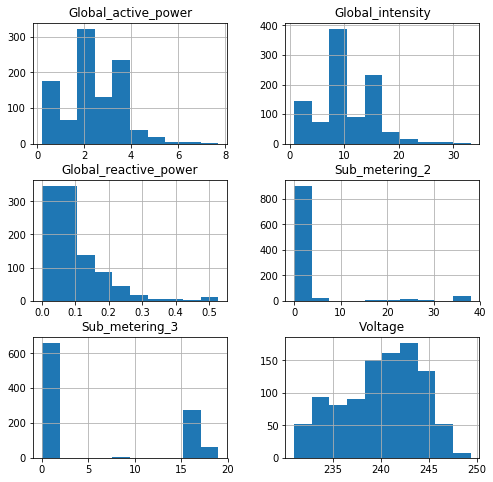

In [98]:
pc_df.hist(bins=10,figsize=(8,8));

All the distributions are skewed. <br>
Global_intensity and Global_active_power have similar graphs. Can they be correlated? <br>
We know that Electric Power is Voltage times Current  <br> 

#### Correlation Plot

In [99]:
pc_df.corr().round(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3
Global_active_power,1.00,0.13,-0.70,1.00,0.42,0.53
Global_reactive_power,0.13,1.00,-0.06,0.14,0.14,-0.01
Voltage,-0.70,-0.06,1.00,-0.71,-0.12,-0.70
Global_intensity,1.00,0.14,-0.71,1.00,0.43,0.54
Sub_metering_2,0.42,0.14,-0.12,0.43,1.00,-0.10
Sub_metering_3,0.53,-0.01,-0.70,0.54,-0.10,1.00


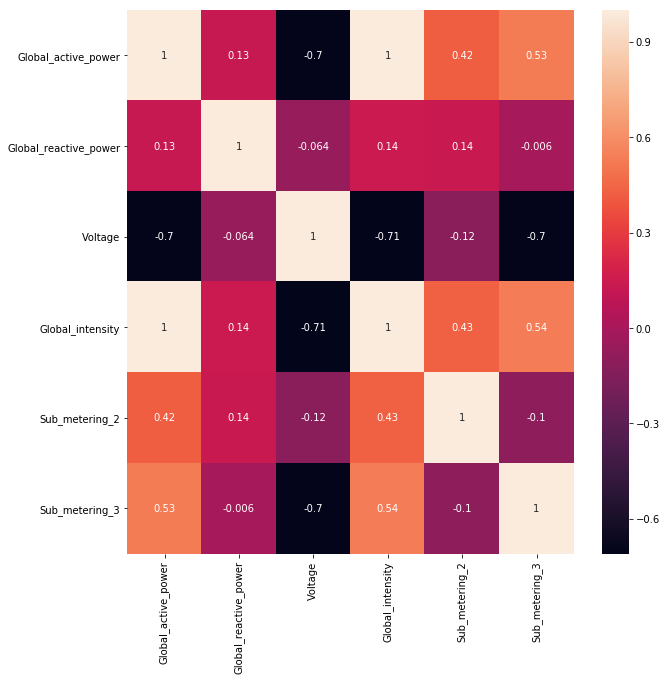

In [100]:
#Ploting corrrlation plot among the features
figsize=[10,10]
plt.figure(figsize=figsize)
sns.heatmap(pc_df.corr(),annot=True)
plt.show()

We observe that 'Global Intensity' and 'Global Active Power' has strong correlation of 0.99  <br>
Global Active Power has good negetive correlation with Voltage with correlation = -0.69  <br>
Voltage and Global Intensity have have strong negetive correlation = -0.71   <br>

Sub_metering_3 has good correlation with Global Active Power and Global_Intensty and negetive correlation with Voltage.  <br>
It seems most of the power is consumed by electric water-heater and an air-conditioner

Sub_metering_2 has some correlation with Global Active Power and Global_Intensty. <br>
This energy is consumed by laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

### Pairplot

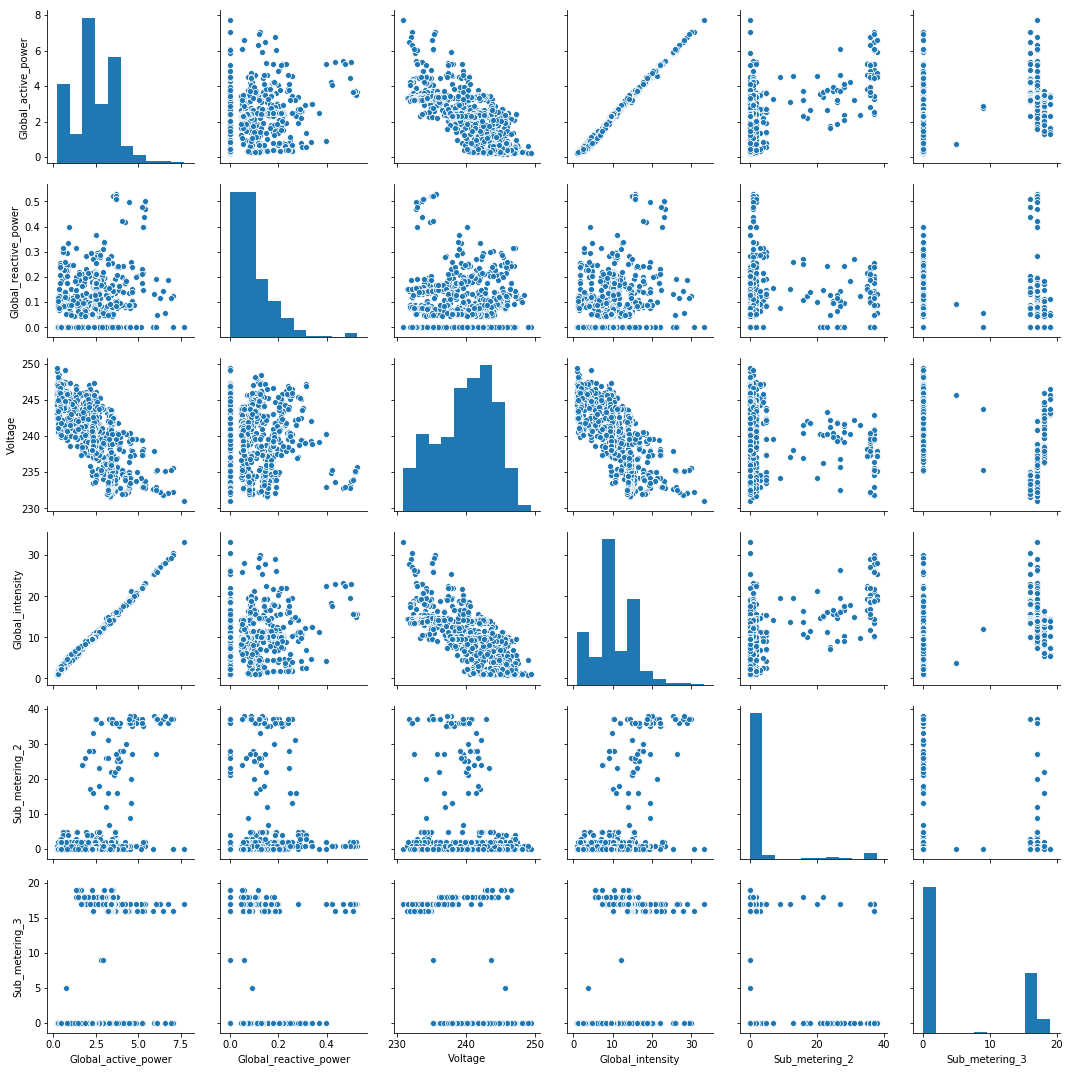

In [101]:
sns.pairplot(pc_df,kind='scatter')

Here we can clearly observe some strong correlations. The weak correlations are a bit difficult to identify.

Global_reactive_power has no relations with any of the rest of the variables. So, we can skip it for our clustering algorithm.

### 4. Finding Clusters with Elbow Method  <a id='elbow'>

In [102]:
from sklearn.cluster import KMeans

ssw=[]
cluster_range=range(1,10)
for i in cluster_range:
    model=KMeans(n_clusters=i,init="k-means++",n_init=10, max_iter=300, random_state=0)
    model.fit(pc_df)
    ssw.append(model.inertia_)

In [103]:
ssw_df=pd.DataFrame({"no. of clusters":cluster_range,"SSW":ssw})
print(ssw_df)

   no. of clusters            SSW
0                1  174867.345629
1                2   92841.354033
2                3   28808.898460
3                4   21135.553992
4                5   17775.550044
5                6   14647.537531
6                7   12210.730841
7                8   10764.783022
8                9    9360.928592


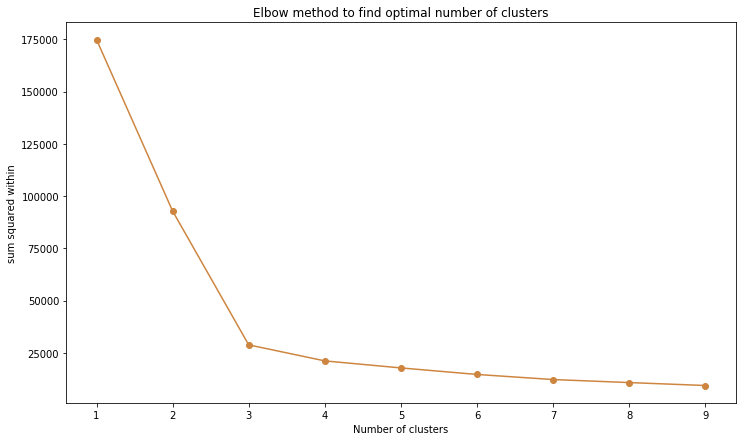

In [104]:
plt.figure(figsize=(12,7))
plt.plot(cluster_range, ssw, marker = "o",color="peru")
plt.xlabel("Number of clusters")
plt.ylabel("sum squared within")
plt.title("Elbow method to find optimal number of clusters")
plt.show()

**We spotted the elbow when number of clusters is 4 and after 4th cluster there is no significant change in ssw**

### 5. Building K Means model  <a id='Kmeans'>

In [106]:
# We'll continue our analysis with n_clusters=3
kmeans=KMeans(n_clusters=3, init="k-means++", n_init=10, random_state = 42)
# Fit the model
k_model=kmeans.fit(pc_df)

In [107]:
## It returns the cluster vectors i.e. showing observations belonging to which clusters 
clusters=k_model.labels_
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**So the observations belongs to 4 clusters** <br>

In [108]:
#Adding a new column 'clusters to iris dataset'
pc_df['clusters']=clusters
print(pc_df.head())
print(pc_df.tail())

   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_2  Sub_metering_3  clusters  
0             1.0            17.0         0  
1             1.0            16.0         0  
2             2.0            17.0         0  
3             1.0            17.0         0  
4             1.0            17.0         0  
     Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
994                2.288                  0.056   238.09               9.6   
995                2.296                  0.054   238.13               9.6   
996                2.292         

In [109]:
## Size of each cluster
pc_df['clusters'].value_counts()

1    607
0    326
2     66
Name: clusters, dtype: int64

In [111]:
# Centroid of each clusters
centroid_df = pd.DataFrame(k_model.cluster_centers_, columns=['Global_active_power','Voltage','Global_intensity',
                'Sub_metering_2','Sub_metering_3','clusters'])
centroid_df.drop(['clusters'],axis=1,inplace=True)
centroid_df

,Global_active_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3
0,3.290994,0.087466,235.988957,14.013497,0.714724
1,1.751239,0.087331,242.381269,7.538715,0.645799
2,4.240182,0.115879,238.491061,18.078788,32.181818


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


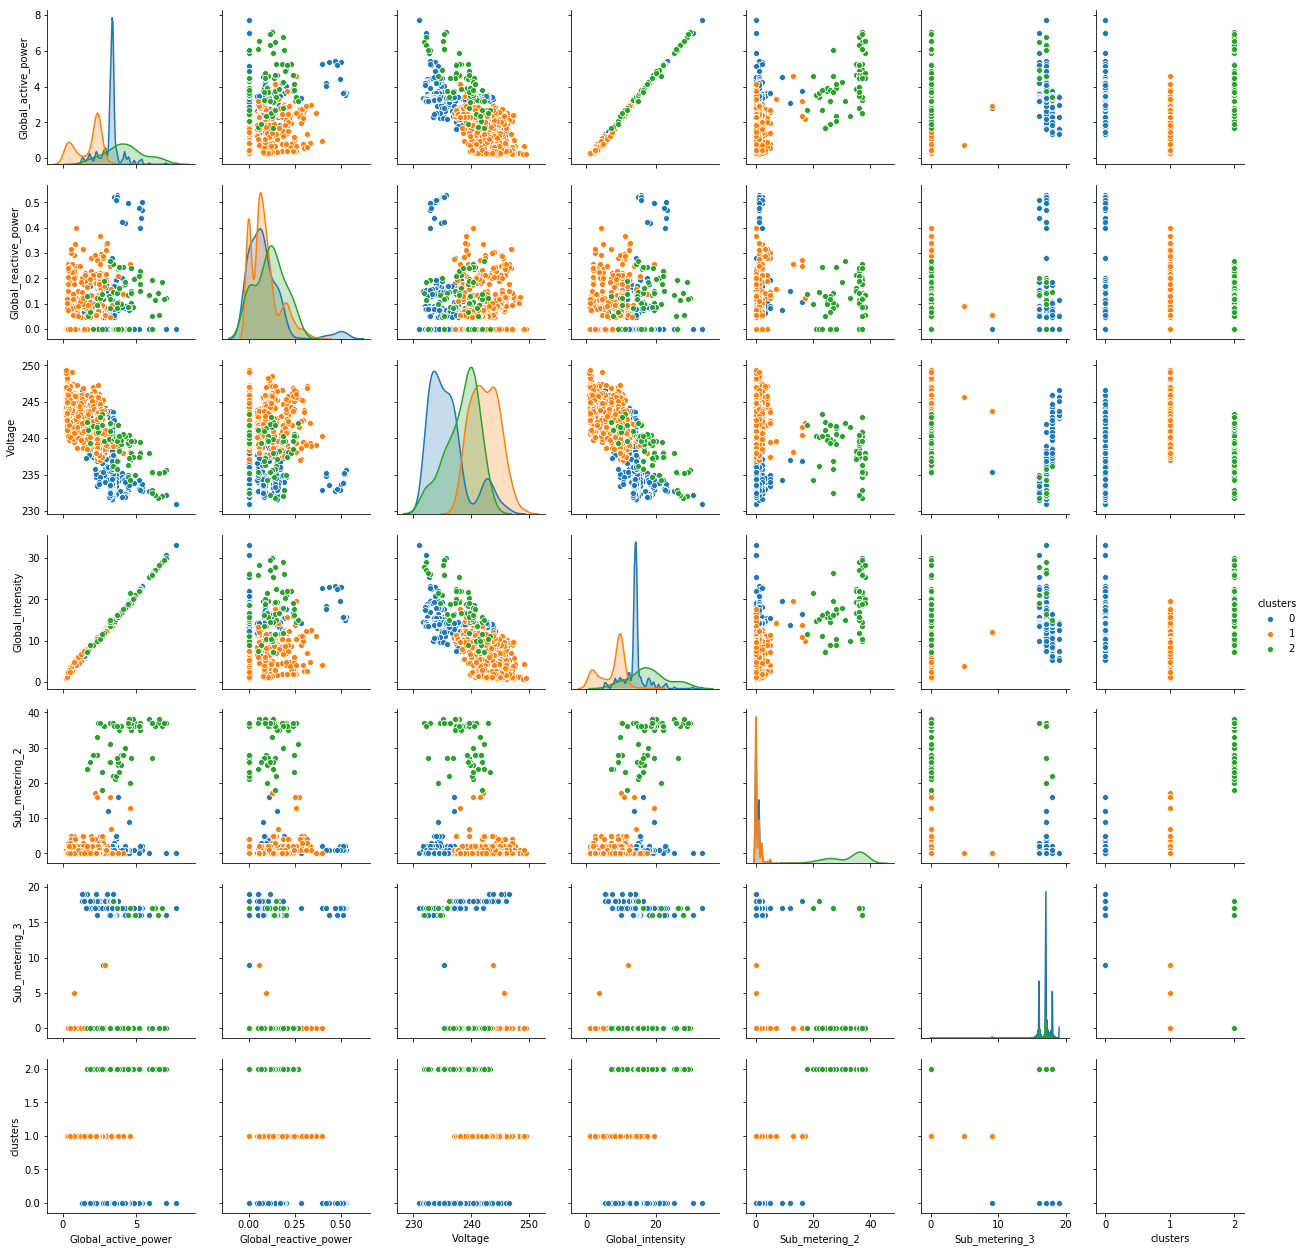

In [112]:
### Visualizing the cluster based on each pair of columns

sns.pairplot(pc_df, hue='clusters');

### The End